<a href="https://colab.research.google.com/github/kykytsapol/-YouTube-/blob/main/%D0%A1%D0%B5%D0%BD%D1%82%D0%B8%D0%BC%D0%B5%D0%BD%D1%82_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_excel("10к_сентиментов.xlsx",index_col=0)
df.head()

text_clear  label
91169   нетленка сети стесняемся заходим смотрим оцени...      1
102625                      азаза ванга разрешила спокоен      1
129280  сегодня последняя серия молодежки пойду поплач...      0
43840   красивый желанный пока произнёс слова дзеуки д...      1
141571                  чет сегодня радио т лагает детски      0

In [ ]:
X = df['text_clear']
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
#настраиваем класс CountVectorizer- предупреждаем, что отбираем токены с частотностью не менее 2
vectorizer = CountVectorizer(min_df=2, max_features=10000)
#далее подаем в метод transform класса CountVectorizer столбец Текст_на_векторизацию
train_vectors = vectorizer.fit_transform(X_train.values.astype('U'))
test_vectors = vectorizer.transform(X_test.values.astype('U'))

Я буду рассматривать два типа Наивного Баейвского классификатора: бернуллиевский и полиномиальный (или мультиноминальный)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(train_vectors, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report

Обучим сначала мультиноминальный классифкатор.

In [ ]:
# предсказываю результаты и вывожу оценку предсказания
predictions = nb.predict(test_vectors)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69     16402
           1       0.69      0.72      0.70     16598

    accuracy                           0.70     33000
   macro avg       0.70      0.70      0.70     33000
weighted avg       0.70      0.70      0.70     33000



In [ ]:
from sklearn.model_selection import GridSearchCV

С помощью сетки подберем опимальные параметры для модели. Я буду рассматривать модели на основе параметр аддитивного (Лапласа/Лидстоуна) сглаживания (alpha).

In [ ]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

In [ ]:
nb_grid = GridSearchCV(MultinomialNB(), param_grid=params)
nb_grid.fit(train_vectors, y_train)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]})

In [ ]:
# выводим лучшие параметры после обучения
print(nb_grid.best_params_)
 
# вот как наша модель выглядит после настройки гиперпараметров
print(nb_grid.best_estimator_)

{'alpha': 10.0}
MultinomialNB(alpha=10.0)


In [ ]:
# лучшее значение точности на обучающем множестве
print(nb_grid.best_score_)

0.6984328358208955


In [ ]:
# теперь посмотрим как наша модель работает на данных, которые она никогда не видела - на тестовом множестве
grid_predictions = nb_grid.predict(test_vectors)
 
# смотрим на classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69     16402
           1       0.70      0.71      0.70     16598

    accuracy                           0.70     33000
   macro avg       0.70      0.70      0.70     33000
weighted avg       0.70      0.70      0.70     33000



In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
roc_svm = get_roc_curve(nb_grid.best_estimator_, test_vectors, y_test)

In [ ]:
from sklearn.metrics import roc_auc_score

def score_auc(model, X, y):
    y_score = model.predict(X) 
    return roc_auc_score(y, y_score)

Еще считаем показатель AUC (площадь под кривой)

In [ ]:
score = score_auc(nb_grid.best_estimator_, test_vectors, y_test)
score

0.6983684926758629

In [ ]:
import matplotlib.pyplot as plt

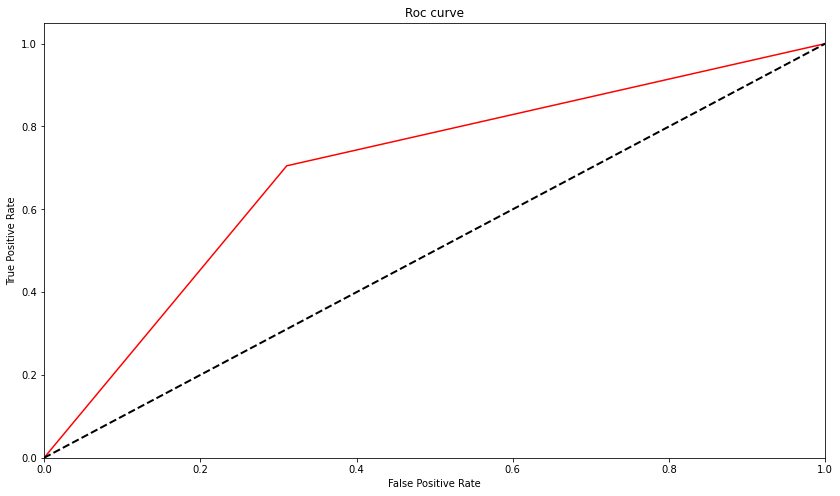

In [ ]:
fpr, tpr = roc_svm
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.show()

Также еще можно вывести матрицу ошибок

In [ ]:
from sklearn.metrics import confusion_matrix 

In [ ]:
import seaborn as sns

Text(23.999999999999996, 0.5, 'Actual')

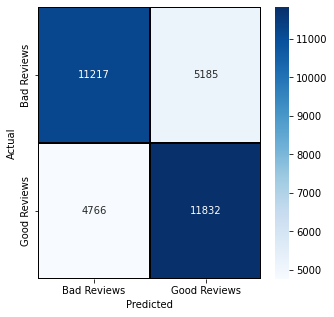

In [ ]:
cm = confusion_matrix(y_test, grid_predictions)
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Bad Reviews','Good Reviews'], 
            yticklabels = ['Bad Reviews','Good Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

Посмотрим на бернулевский классификатор. 

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
# обучаю модель на тестовом сете
model = BernoulliNB(alpha=10.0)
model.fit(train_vectors, y_train)
 
# предсказываю результаты и вывожу оценку предсказания
predictions = model.predict(test_vectors)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69     16246
           1       0.70      0.73      0.71     16754

    accuracy                           0.70     33000
   macro avg       0.70      0.70      0.70     33000
weighted avg       0.70      0.70      0.70     33000



In [ ]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

In [ ]:
nb_grid_ber = GridSearchCV(BernoulliNB(), param_grid=params)
nb_grid_ber.fit(train_vectors, y_train)

GridSearchCV(estimator=BernoulliNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]})

In [ ]:
# выводим лучшие параметры после обучения
print(nb_grid_ber.best_params_)
 
# вот как наша модель выглядит после настройки гиперпараметров
print(nb_grid_ber.best_estimator_)

{'alpha': 10.0}
BernoulliNB(alpha=10.0)


In [ ]:
# лучшее значение точности на обучающем множестве
print(nb_grid_ber.best_score_)

0.6973731343283582


In [ ]:
# теперь посмотрим как наша модель работает на данных, которые она никогда не видела - на тестовом множестве
grid_predictions = nb_grid_ber.predict(test_vectors)
 
# смотрим на classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69     16246
           1       0.70      0.73      0.71     16754

    accuracy                           0.70     33000
   macro avg       0.70      0.70      0.70     33000
weighted avg       0.70      0.70      0.70     33000



In [ ]:
def get_roc_curve(model, X, y):
    pred = nb_grid_ber.predict(X)
    fpr, tpr, _ = roc_curve(y, pred)
    return fpr, tpr

In [ ]:
roc_svm = get_roc_curve(nb_grid_ber.best_estimator_, test_vectors, y_test)

In [ ]:
from sklearn.metrics import roc_auc_score

def score_auc(model, X, y):
    y_score = model.predict(X) 
    return roc_auc_score(y, y_score)

In [ ]:
score = score_auc(nb_grid_ber.best_estimator_, test_vectors, y_test)
score

0.6978664548490592

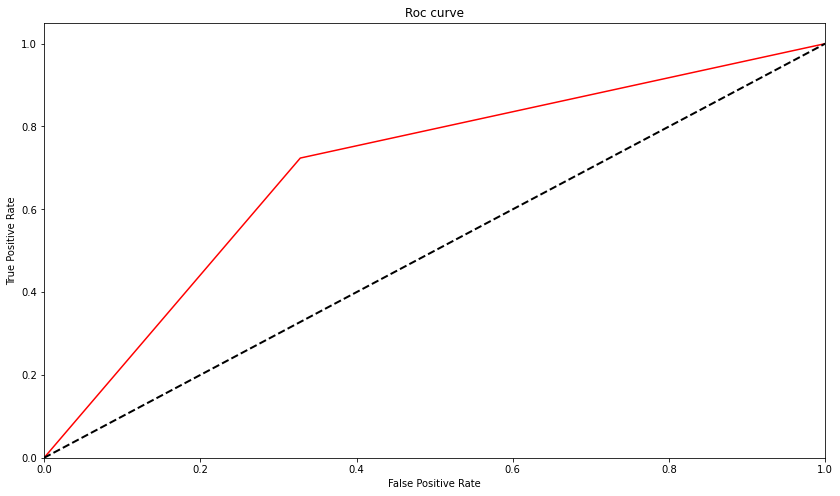

In [ ]:
fpr, tpr = roc_svm
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.show()

Text(23.999999999999996, 0.5, 'Actual')

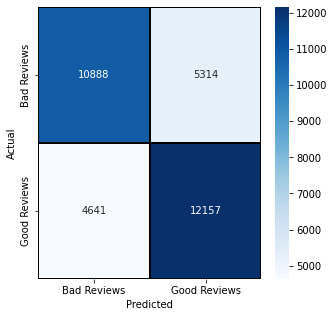

In [ ]:
cm = confusion_matrix(y_test, grid_predictions)
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Bad Reviews','Good Reviews'], 
            yticklabels = ['Bad Reviews','Good Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
score = score_auc(model, test_vectors, y_test)
score

0.6978664548490592

В итоге в качестве лучшей модели я выбрала бернулевский классификатор

In [ ]:
data1 = pd.read_excel("доминирующие_топики_доковида.xlsx", usecols = 'C, F, G')
data1.head()

Доминирующий_топик                                 Оригинальный_текст  \
0                   0  Эксперты раскрывают многие магические секреты....   
1                   0  гаданием на картах таро увлеклась моя знакомая...   
2                   1  Любовь надо искать на своей улице....мораль се...   
3                   0  Деньги это не главное , главное  Любовь на всю...   
4                   2              моя бабушка любит мистические истории   

                               Преобразованный_текст  
0  эксперт раскрывать многий магический секрет хо...  
1  гадание карта таро увлекаться знакомый дом при...  
2   любовь искать  улица мораль сей басня худо добро  
3                      деньги главный главное любовь  
4                 бабушка любить мистический история

In [ ]:
text = vectorizer.transform(data1["Преобразованный_текст"].values.astype('U'))

In [ ]:
sentiment_text = model.predict(text)

In [ ]:
data1['sentiment_text'] = sentiment_text
data1

Доминирующий_топик                                 Оригинальный_текст  \
0                       0  Эксперты раскрывают многие магические секреты....   
1                       0  гаданием на картах таро увлеклась моя знакомая...   
2                       1  Любовь надо искать на своей улице....мораль се...   
3                       0  Деньги это не главное , главное  Любовь на всю...   
4                       2              моя бабушка любит мистические истории   
...                   ...                                                ...   
30400                   1       Хочется узнать есть ли у меня порча или нет.   
30401                   0  Rima Versuliene . А я не видела себя. Значит в...   
30402                   0  О ком вы хотели сказать.Мне на самом деле очен...   
30403                   0             Аня ты умничка, весь расклад совпадает   
30404                   2                           И мне про Тельцов и Дев)   

                                   Преобразованный_текст  sentiment_text  
0      эксперт раскрывать многий магический секрет хо...               0  
1      гадание карта таро увлекаться знакомый дом при...               0  
2       любовь искать  улица мораль сей басня худо добро               1  
3                          деньги главный главное любовь               1  
4                     бабушка любить мистический история               0  
...                                                  ...             ...  
30400                            хотеться узнавать порча               1  
30401                                      видеть ерунда               1  
30402                                   самый дело плохо               0  
30403                          умничек расклад совпадать               1  
30404                                         телец дева               1  

[30405 rows x 4 columns]

In [ ]:
# смотрим сколько всего негавтивных и позитивных текстов.
data1.groupby('sentiment_text').sentiment_text.count()

sentiment_text
0     8391
1    22014
Name: sentiment_text, dtype: int64

In [ ]:
data11 = pd.read_excel("доминирующие_топики_послековида.xlsx", usecols = 'C, F, G')
data11.head()

Доминирующий_топик                                 Оригинальный_текст  \
0                   3  тайм-коды:\n0:10 - Флаг! ⚡\n0:25 - до начала э...   
1                   7                 Жаль до моргенштерна не добрались.   
2                   3  Невзоров в перерыве, говоря о Вассермане, сказ...   
3                   3  Многие удивляются, - а почему так быстро свари...   
4                   6  Спасибо! Про Дуню забавно. А что если и Вассер...   

                               Преобразованный_текст  
0  тайм код   флаг   начало эфир эхо москва детск...  
1                        жаль моргенштерн добираться  
2  невзоров перерыв говоритьссерман настольпотряс...  
3  многие удивляться быстро свариватькцина причем...  
4  дуня забавноссерман баба сиська борода похоже ...

In [ ]:
text = vectorizer.transform(data11["Преобразованный_текст"].values.astype('U'))

In [ ]:
sentiment_text = model.predict(text)

In [ ]:
data11['sentiment_text'] = sentiment_text
data11

Доминирующий_топик                                 Оригинальный_текст  \
0                       3  тайм-коды:\n0:10 - Флаг! ⚡\n0:25 - до начала э...   
1                       7                 Жаль до моргенштерна не добрались.   
2                       3  Невзоров в перерыве, говоря о Вассермане, сказ...   
3                       3  Многие удивляются, - а почему так быстро свари...   
4                       6  Спасибо! Про Дуню забавно. А что если и Вассер...   
...                   ...                                                ...   
54782                   4  шанс всегда хорошо виден - распознать нетрудно...   
54783                   0                             Ю\n\n\n\n\n\n\n\n\n\nЮ   
54784                   5             А сами расклад смотрите?????? Зачем???   
54785                   7                             Та же самая история!!!   
54786                   2    Благо Дарю сердечно и благо принимаю  сердцем))   

                                   Преобразованный_текст  sentiment_text  
0      тайм код   флаг   начало эфир эхо москва детск...               1  
1                            жаль моргенштерн добираться               0  
2      невзоров перерыв говоритьссерман настольпотряс...               1  
3      многие удивляться быстро свариватькцина причем...               1  
4      дуня забавноссерман баба сиська борода похоже ...               1  
...                                                  ...             ...  
54782  шанс видный распознавать нетрудно трудно решаться               0  
54783                                                ю ю               1  
54784                                   расклад смотреть               1  
54785                                      самый история               1  
54786         благо дарить сердечно благо принимать серд               0  

[54787 rows x 4 columns]

In [ ]:
# смотрим сколько всего негавтивных и позитивных текстов.
data11.groupby('sentiment_text').sentiment_text.count()

sentiment_text
0    17122
1    37665
Name: sentiment_text, dtype: int64

In [ ]:
data1.to_excel('оценка_тональности_всех_текстов_доковида_nb.xlsx')
data11.to_excel('оценка_тональности_всех_текстов_послековида_nb.xlsx')

In [ ]:
data2 = pd.read_excel("только_топики_доковида.xlsx", index_col = 0)
data2.head()

Ключевые_слова
Топик                                                   
0      расклад, знать, благодарить, хороший, отношени...
1      таро, благодарить, видео, огромный, большой, к...
2      карта, колода, вопрос, таро, говорить, мир, ар...

In [ ]:
topic1 = vectorizer.transform(data2["Ключевые_слова"])

In [ ]:
sentiment_topic = model.predict(topic1)

In [ ]:
data2['sentiment_text'] = sentiment_topic
data2

Ключевые_слова  sentiment_text
Топик                                                                   
0      расклад, знать, благодарить, хороший, отношени...               1
1      таро, благодарить, видео, огромный, большой, к...               1
2      карта, колода, вопрос, таро, говорить, мир, ар...               0

In [ ]:
data3 = pd.read_excel("только_топики_послековида.xlsx", index_col = 0)
data3

Ключевые_слова
Топик                                                   
0      март, февраль, карта, прогноз, выходить, месяц...
1      ребенок, жить, друг, любить, мужчина, женщина,...
2      благодарить, благо, желать, счастие, бог, дава...
3      говорить, игра, знак, язык, ангел, сила, война...
4      понимать, видеть, говорить, слово, помогать, в...
5      расклад, благодарить, смотреть, делать, вопрос...
6      таро, канал, видео, карта, комментарий, поддер...
7      украина, россия, мир, война, страна, донбасс, ...

In [ ]:
topic2 = vectorizer.transform(data3["Ключевые_слова"])

In [ ]:
sentiment_topic = model.predict(topic2)

In [ ]:
data3['sentiment_text'] = sentiment_topic
data3

Ключевые_слова  sentiment_text
Топик                                                                   
0      март, февраль, карта, прогноз, выходить, месяц...               0
1      ребенок, жить, друг, любить, мужчина, женщина,...               1
2      благодарить, благо, желать, счастие, бог, дава...               1
3      говорить, игра, знак, язык, ангел, сила, война...               1
4      понимать, видеть, говорить, слово, помогать, в...               0
5      расклад, благодарить, смотреть, делать, вопрос...               1
6      таро, канал, видео, карта, комментарий, поддер...               1
7      украина, россия, мир, война, страна, донбасс, ...               1

In [ ]:
data1.groupby("Доминирующий_топик").aggregate({'sentiment_text': 'mean'})

sentiment_text
Доминирующий_топик                
0                         0.638157
1                         0.833411
2                         0.700563

In [ ]:
data11.groupby("Доминирующий_топик").aggregate({'sentiment_text': 'mean'})

sentiment_text
Доминирующий_топик                
0                         0.473611
1                         0.585019
2                         0.852239
3                         0.715960
4                         0.647050
5                         0.749881
6                         0.787372
7                         0.707201

In [ ]:
data1['sentiment_text'] = data1['sentiment_text'].apply(lambda x: "позитивное" if x == 1 else "негативное")

In [ ]:
data1.groupby(["Доминирующий_топик", 'sentiment_text']).Доминирующий_топик.aggregate('count')

Доминирующий_топик  sentiment_text
0                   негативное        4108
                    позитивное        7245
1                   негативное        1783
                    позитивное        8920
2                   негативное        2500
                    позитивное        5849
Name: Доминирующий_топик, dtype: int64

In [ ]:
data11['sentiment_text'] = data11['sentiment_text'].apply(lambda x: "позитивное" if x == 1 else "негативное")

In [ ]:
data11.groupby(["Доминирующий_топик", 'sentiment_text']).Доминирующий_топик.aggregate('count')

Доминирующий_топик  sentiment_text
0                   негативное        4149
                    позитивное        3733
1                   негативное        3119
                    позитивное        4397
2                   негативное        1343
                    позитивное        7746
3                   негативное        1139
                    позитивное        2871
4                   негативное        2297
                    позитивное        4211
5                   негативное        2097
                    позитивное        6287
6                   негативное         953
                    позитивное        3529
7                   негативное        2025
                    позитивное        4891
Name: Доминирующий_топик, dtype: int64

In [ ]:
data1.to_excel('оценка_тональности_всего_доковида_nb.xlsx')
data11.to_excel('оценка_тональности_всего_послековида_nb.xlsx')